<a href="https://colab.research.google.com/github/estrelasdomackenzie/Projeto-Aplicado-II./blob/main/Projeto_Aplicado_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acesse o repositório da KNRA Seguros

https://github.com/estrelasdomackenzie/Projeto-Aplicado-II./tree/main

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from prophet import Prophet

# CARREGAMENTO E CONSOLIDAÇÃO DOS DADOS

In [ ]:
# Monta o Google Drive no diretório '/content/drive'
# Isso permite acessar os arquivos do seu Drive como se fossem locais
drive.mount('/content/drive')

# Define um caminho para uma pasta
path = '/content/drive/My Drive/https://drive.google.com/drive/folders/1aPMBQRbw8Z_fDZMNRMZItAb4es82gouM?usp=drive_link'

# Imprime o caminho
print(path)

Mounted at /content/drive
/content/drive/My Drive/https://drive.google.com/drive/folders/1aPMBQRbw8Z_fDZMNRMZItAb4es82gouM?usp=drive_link


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202306.xltx')
df2 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202307.xltx')
df3 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202308.xltx')
df4 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202309.xltx')
df5 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202310.xltx')
df6 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202311.xltx')
df7 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202312.xltx')
df8 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202401.xltx')
df9 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202402.xltx')
df10 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202403.xltx')
df11 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202404.xltx')
df12 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202405.xltx')
df13 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202406.xltx')
df14 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202407.xlsx')
df15 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202408.xlsx')
df16 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202409.xlsx')
df17 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202410.xlsx')
df18 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202411.xlsx')
df19 = pd.read_excel('/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado/D.SDA.PDA.005.CAT.202412.xlsx')

In [ ]:
# Consolidação em um único DataFrame
combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9,
                         df10, df11, df12, df13, df14, df15, df16, df17, df18, df19])

# Informações básicas sobre o DataFrame consolidado
print(f"Dimensões do DataFrame consolidado: {combined_df.shape}")
print(f"Total de registros: {combined_df.shape[0]}")
print(f"Total de colunas: {combined_df.shape[1]}")

Dimensões do DataFrame consolidado: (889165, 28)
Total de registros: 889165
Total de colunas: 28


In [ ]:
#Exibe tabela completa
print(combined_df)

     Agente  Causador  Acidente Data Acidente     CBO                 CBO.1  \
0          Temperatura Muito Ba    2023-05-31  841815  841815-Oper. Máquina   
1          Atrito ou Abrasao po    2023-05-30  514205  514205-Coletor Lixo    
2          Temperatura Muito Al    2023-05-31  762005  762005-Trab. Polival   
3          Atrito ou Abrasao, N    2023-05-30  313315  313315-Tec. de Telec   
4          Rua e Estrada - Supe    2023-05-30  422315  422315-Oper. Telemar   
...                         ...           ...     ...                   ...   
9726       Chao - Superficie Ut    2024-12-30  784205  784205-Alimentador d   
9727       Agente Infeccioso ou    2024-12-31  322205  322205-Tec. de Enfer   
9728       Escada Permanente Cu    2024-12-30  411010  411010-Assistente Ad   
9729       Motocicleta, Motonet    2024-12-23  301105  301105-Tec. Laborató   
9730       Motocicleta, Motonet    2024-12-27  991305  991305-Funileiro de    

      CID-10              CID-10.1  CNAE2.0 Emprega

# ANÁLISE EXPLORATÓRIA DETALHADA

In [ ]:
# Seleção das colunas principais
colunas_importantes = ['Agente  Causador  Acidente', 'CBO', 'Data Acidente' , 'Data Nascimento' , 'Sexo' , 'UF  Munic.  Acidente']
col_selecionadas = combined_df[colunas_importantes].copy()  # Adicionei .copy()

print("Primeiras linhas do DataFrame com colunas selecionadas:")
print(col_selecionadas.head())

Primeiras linhas do DataFrame com colunas selecionadas:
  Agente  Causador  Acidente     CBO Data Acidente      Data Nascimento  \
0       Temperatura Muito Ba  841815    2023-05-31  1987-06-26 00:00:00   
1       Atrito ou Abrasao po  514205    2023-05-30  2001-06-20 00:00:00   
2       Temperatura Muito Al  762005    2023-05-31  1983-08-01 00:00:00   
3       Atrito ou Abrasao, N  313315    2023-05-30  1992-12-31 00:00:00   
4       Rua e Estrada - Supe  422315    2023-05-30  1992-12-07 00:00:00   

                   Sexo  UF  Munic.  Acidente  
0  Masculino             Maranhão              
1  Masculino             {ñ class}             
2  Masculino             {ñ class}             
3  Masculino             {ñ class}             
4  Feminino              {ñ class}             


In [ ]:
# Verificação de valores ausentes
print("\nVerificação de valores ausentes por coluna:")
print(col_selecionadas.isnull().sum())


Verificação de valores ausentes por coluna:
Agente  Causador  Acidente    0
CBO                           0
Data Acidente                 0
Data Nascimento               0
Sexo                          0
UF  Munic.  Acidente          0
dtype: int64


In [ ]:
# Análise da coluna CBO
num_distintos = combined_df["CBO"].nunique()
print(f"Número de códigos CBO distintos: {num_distintos}")

Número de códigos CBO distintos: 2271


In [ ]:
# Top 10 CBOs mais frequentes
top_cbo = combined_df["CBO"].value_counts().head(10)
print("Top 10 códigos CBO mais frequentes:")
print(top_cbo)

Top 10 códigos CBO mais frequentes:
CBO
784205    59240
322205    56225
514320    38220
782510    22530
717020    18155
513505    13772
521110    13227
411010    12597
411005    12564
223505    12379
Name: count, dtype: int64


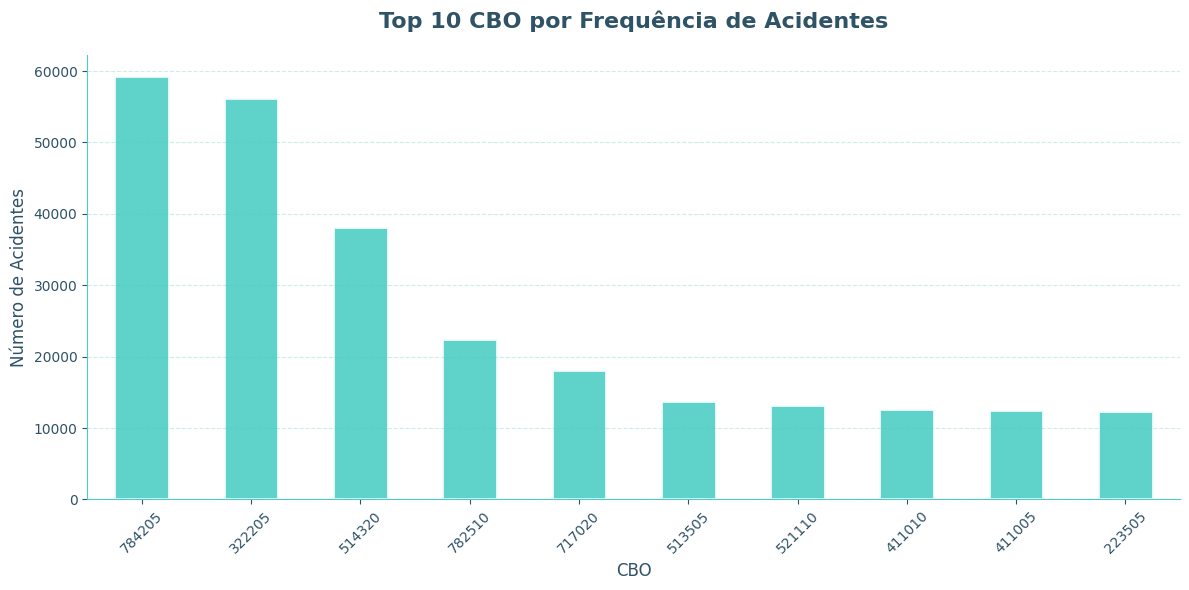

In [ ]:
# 1. Grafico de barras para Top 10 CBOs
plt.figure(figsize=(12, 6))
top_cbo.plot(kind='bar', color='#4ECDC4', edgecolor='white', linewidth=2, alpha=0.9)
plt.title('Top 10 CBO por Frequência de Acidentes', fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('CBO', fontsize=12, color='#2E5266')
plt.ylabel('Número de Acidentes', fontsize=12, color='#2E5266')
plt.xticks(rotation=45)
# Estilização dos eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#4ECDC4')
plt.tight_layout()
plt.savefig('top10_cbo.png')
plt.show()

In [ ]:
#Encotrando valores
print(combined_df[colunas_importantes].copy()['UF  Munic.  Acidente'].unique())

['Maranhão            ' '{ñ class}           ' 'Piauí               '
 'Tocantins           ' 'Zerado              ' 'Rondônia            '
 'Roraima             ' 'Ceará               ' 'Pará                '
 'Acre                ' 'Rio Grande Norte    ' 'Amazonas            '
 'Amapá               ' 'Pernambuco          ' 'Sergipe             '
 'Alagoas             ' 'Paraíba             ']


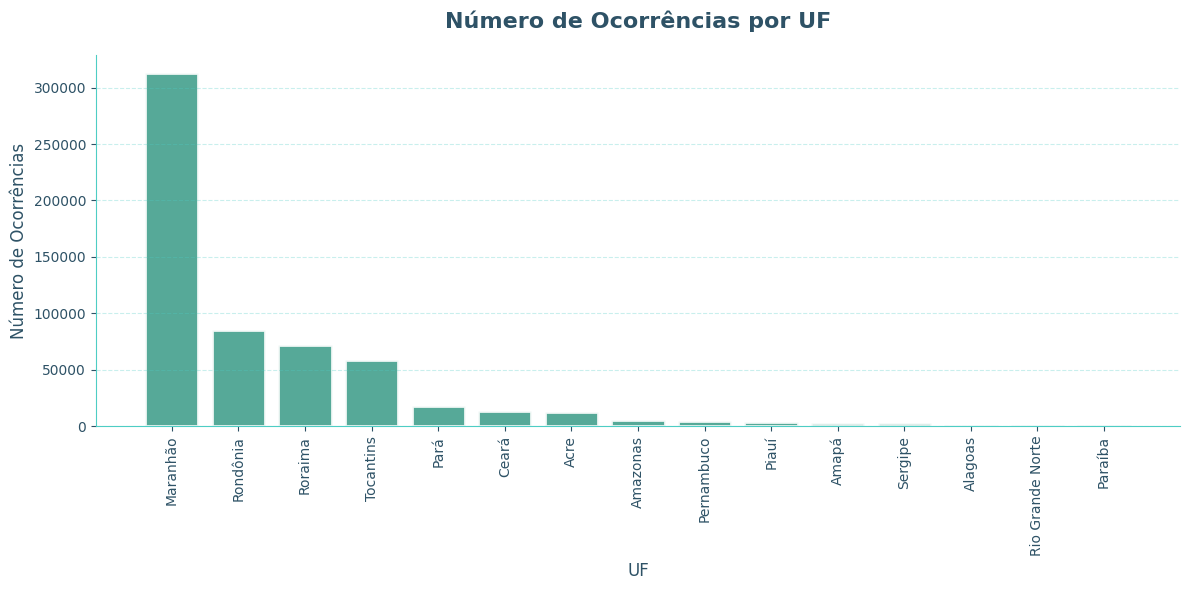

In [ ]:

col_uf_analise = col_selecionadas.copy()  # Cópia específica para análise de UF

# Limpeza específica para UF (só afeta esta cópia)
col_uf_analise['UF  Munic.  Acidente'] = col_uf_analise['UF  Munic.  Acidente'].str.strip()
col_uf_analise = col_uf_analise[col_uf_analise['UF  Munic.  Acidente'] != '{ñ class}']
col_uf_analise = col_uf_analise[col_uf_analise['UF  Munic.  Acidente'] != 'Zerado']
col_uf_analise.reset_index(drop=True, inplace=True)

# Plotar gráfico
ocorrencias_por_uf = col_uf_analise['UF  Munic.  Acidente'].value_counts()
plt.figure(figsize=(12, 6))
bars = plt.bar(ocorrencias_por_uf.index, ocorrencias_por_uf.values,
               color='#44A08D', edgecolor='white', linewidth=2, alpha=0.9)
plt.title("Número de Ocorrências por UF", fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel("UF", fontsize=12, color='#2E5266')
plt.ylabel("Número de Ocorrências", fontsize=12, color='#2E5266')
plt.xticks(rotation=90)
# Estilização
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#4ECDC4')
plt.tight_layout()
plt.show()



Distribuição de acidentes por sexo:
Sexo
Masculino               569909
Feminino                316797
Não Informado             2432
Indeterminado               27
Name: count, dtype: int64


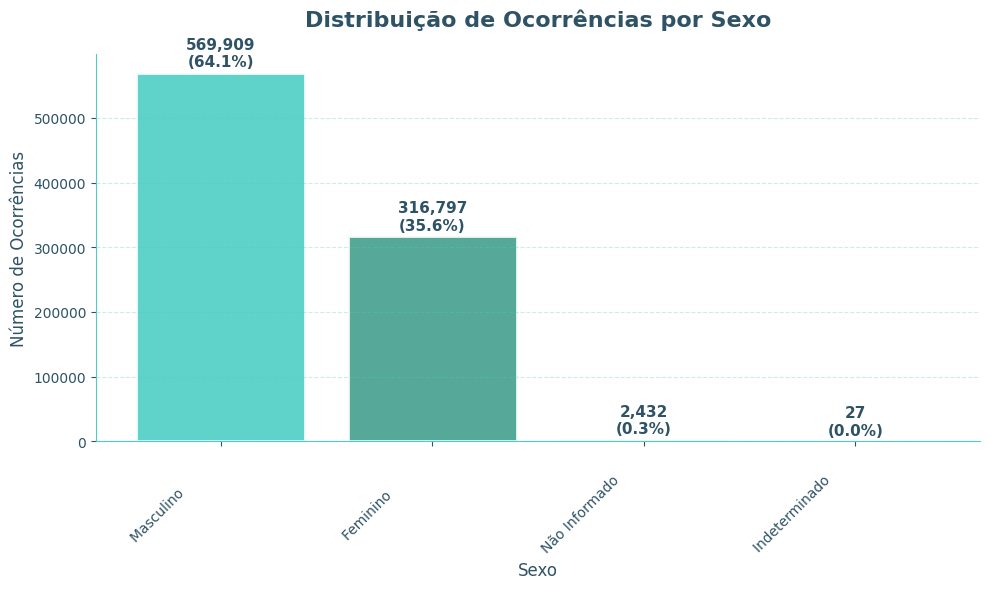

Distribuição de acidentes por sexo:
Sexo
Masculino               569909
Feminino                316797
Não Informado             2432
Indeterminado               27
Name: count, dtype: int64


In [ ]:
#Distribuição por sexo
print("\nDistribuição de acidentes por sexo:")
print(col_selecionadas['Sexo'].value_counts())

ocorrencias_sexo = col_selecionadas['Sexo'].value_counts()
sea_resort_colors = ['#4ECDC4', '#44A08D', '#2E5266', '#26A69A']

# GRÁFICO DE BARRAS SIMPLES E LIMPO
plt.figure(figsize=(10, 6))
bars = plt.bar(ocorrencias_sexo.index, ocorrencias_sexo.values,
               color=sea_resort_colors,
               edgecolor='white', linewidth=2, alpha=0.9)

# Adiciona valores nas barras
for bar, valor in zip(bars, ocorrencias_sexo.values):
    plt.text(bar.get_x() + bar.get_width()/2, valor + max(ocorrencias_sexo.values) * 0.01,
             f'{valor:,}\n({valor/ocorrencias_sexo.sum()*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11, color='#2E5266')

plt.title('Distribuição de Ocorrências por Sexo',
          fontsize=16, fontweight='bold', pad=20, color='#2E5266')
plt.ylabel('Número de Ocorrências', fontsize=12, color='#2E5266')
plt.xlabel('Sexo', fontsize=12, color='#2E5266')

# Estilização limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#4ECDC4')

# Ajusta layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Estatísticas
print("Distribuição de acidentes por sexo:")
print(ocorrencias_sexo)


Análise dos Agentes Causadores mais comuns:
Agente  Causador  Acidente
Motocicleta, Motonet    59642
Impacto de Pes. Cont    41859
Rua e Estrada - Supe    40093
Chao - Superficie Ut    38252
Veiculo, Nic            37293
Veiculo Rodoviario M    36211
Metal - Inclui Liga     33802
Queda de Pes. com Di    32518
Impacto Sofrido por     30361
Faca, Facao- Ferrame    25524
Name: count, dtype: int64


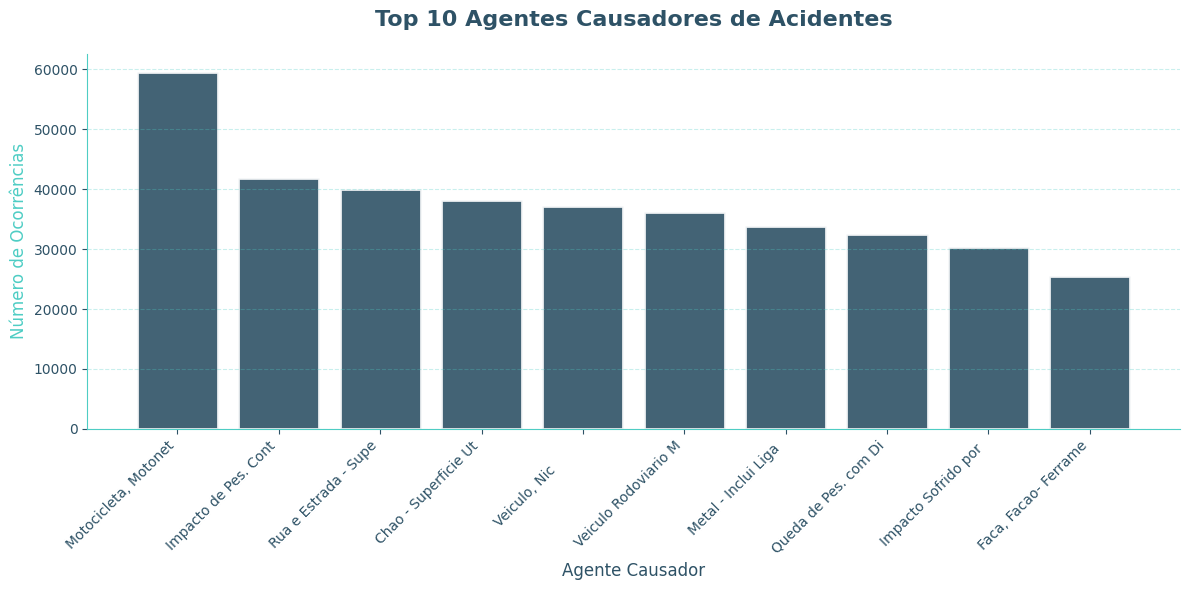

In [ ]:
#Análise por Agente Causador
print("\nAnálise dos Agentes Causadores mais comuns:")
# Corrected column name to match the original DataFrame
top_agentes = col_selecionadas['Agente  Causador  Acidente'].value_counts().head(10)
print(top_agentes)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_agentes.index, top_agentes.values,
               color='#2E5266', edgecolor='white', linewidth=2, alpha=0.9)
plt.title('Top 10 Agentes Causadores de Acidentes', fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Agente Causador', fontsize=12, color='#2E5266')
plt.ylabel('Número de Ocorrências', fontsize=12, color='#2E5266')
plt.xticks(rotation=45, ha='right')
# Estilização
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#4ECDC4')
plt.tight_layout()
plt.savefig('top_agentes_causadores.png')
plt.show()



Analisando relação entre Agente Causador e UF...


<Figure size 1600x1000 with 0 Axes>

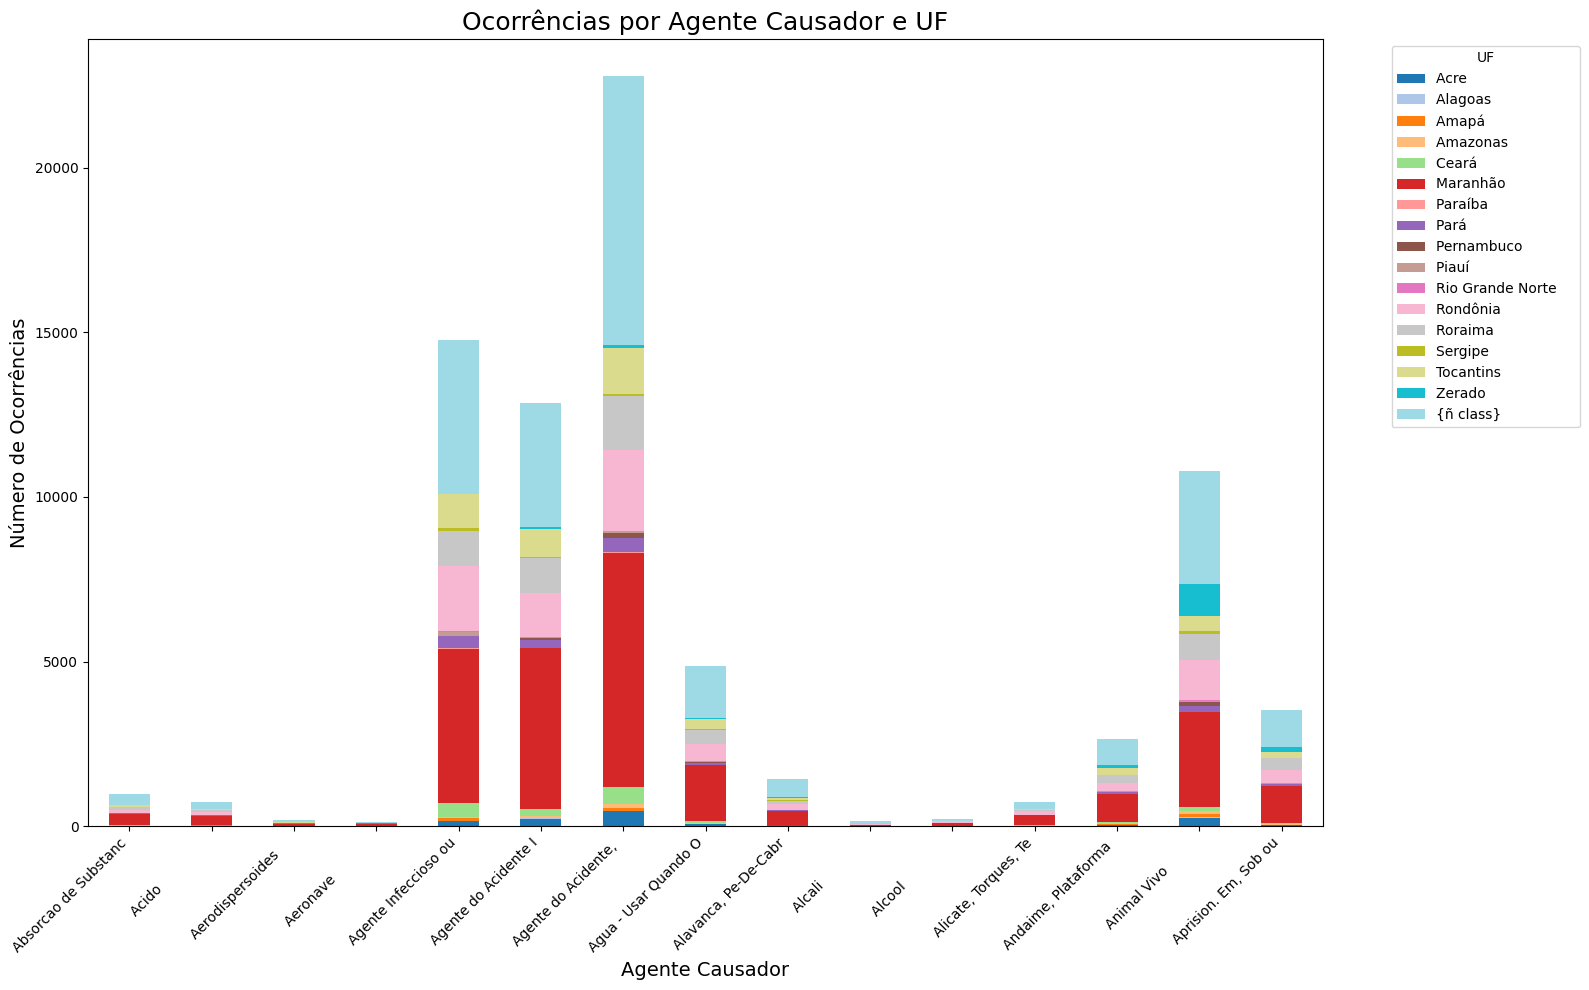

In [ ]:
#Relação entre agente causador e UF
print("\nAnalisando relação entre Agente Causador e UF...")

ocorrencias_agente_uf = col_selecionadas.groupby(['Agente  Causador  Acidente', 'UF  Munic.  Acidente']).size().unstack()
if ocorrencias_agente_uf.shape[0] > 15:  # Limitar para os 15 principais agentes causadores
    ocorrencias_agente_uf = ocorrencias_agente_uf.head(15)

plt.figure(figsize=(16, 10))
ocorrencias_agente_uf.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))
plt.title('Ocorrências por Agente Causador e UF', fontsize=18)
plt.xlabel('Agente Causador', fontsize=14)
plt.ylabel('Número de Ocorrências', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('agente_causador_uf.png')
plt.show()

# TRATAMENTO DE DADOS

In [ ]:
# Criar uma cópia do DataFrame para processamento
df = combined_df.copy()

In [ ]:
# Conversão de datas
df['Data Nascimento'] = pd.to_datetime(df['Data Nascimento'], errors='coerce')
df['Data Acidente'] = pd.to_datetime(df['Data Acidente'], errors='coerce')

# Remoção de linhas com valores ausentes em campos críticos
df.dropna(subset=['Data Nascimento', 'Data Acidente', 'CBO'], inplace=True)

# Cálculo da idade
df['Idade'] = (df['Data Acidente'] - df['Data Nascimento']).dt.days / 365.25

# Tratamento de idades negativas ou muito altas (possíveis erros)
df.loc[df['Idade'] < 0, 'Idade'] = np.nan
df.loc[df['Idade'] > 100, 'Idade'] = np.nan
df.dropna(subset=['Idade'], inplace=True)


In [ ]:
# Estatísticas descritivas da idade
print("\nEstatísticas de idade:")
print(df['Idade'].describe())


Estatísticas de idade:
count    888012.000000
mean         36.364057
std          11.656274
min           3.285421
25%          26.554415
50%          35.071869
75%          44.646133
max          97.749487
Name: Idade, dtype: float64


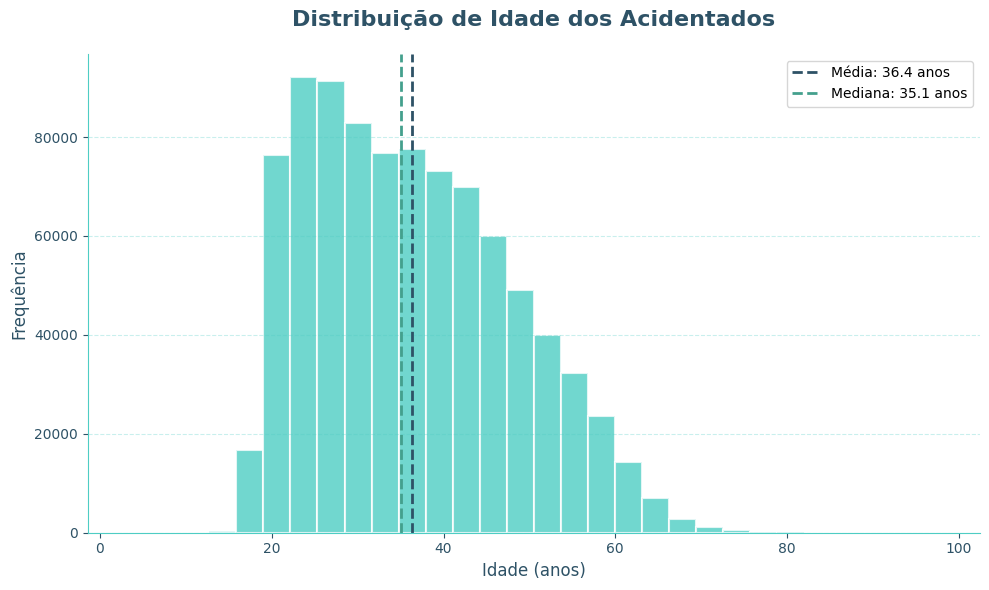

In [ ]:
# Histograma de idade
plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=30, color='#4ECDC4', alpha=0.8, edgecolor='white', linewidth=1.5)
plt.title('Distribuição de Idade dos Acidentados', fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Idade (anos)', fontsize=12, color='#2E5266')
plt.ylabel('Frequência', fontsize=12, color='#2E5266')
plt.axvline(df['Idade'].mean(), color='#2E5266', linestyle='--', linewidth=2,
            label=f'Média: {df["Idade"].mean():.1f} anos')
plt.axvline(df['Idade'].median(), color='#44A08D', linestyle='--', linewidth=2,
            label=f'Mediana: {df["Idade"].median():.1f} anos')
plt.legend()
# Estilização
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#4ECDC4')
plt.tight_layout()
plt.savefig('distribuicao_idade.png')
plt.show()

In [ ]:
# Idade média por CBO (Top 10)
print("\nIdade média por CBO (Top 10):")
idade_por_cbo = df.groupby('CBO')['Idade'].mean().sort_values(ascending=False).head(10)
print(idade_por_cbo)


Idade média por CBO (Top 10):
CBO
262610    76.813142
612320    71.920602
251120    71.312799
214235    64.577687
10110     63.474333
234652    63.321013
311115    62.024184
613005    61.931554
223216    61.733060
213415    61.201916
Name: Idade, dtype: float64


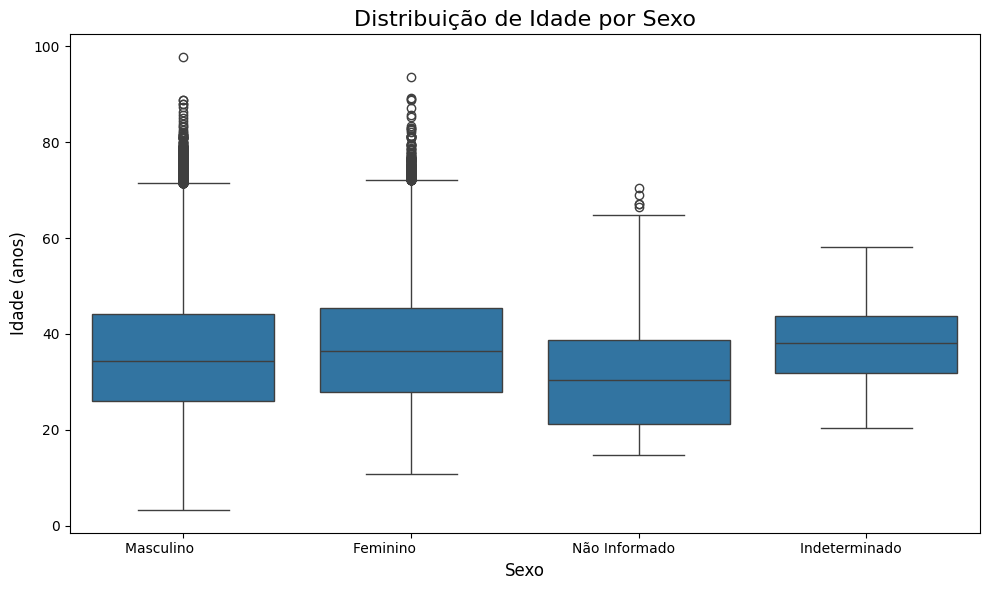

In [ ]:
# Boxplot de idade por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexo', y='Idade', data=df)
plt.title('Distribuição de Idade por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Idade (anos)', fontsize=12)
plt.tight_layout()
plt.savefig('idade_por_sexo.png')
plt.show()

TRAZER ATIVAMENTE APENAS OS DADOS UTILIZADOS COLUNAS

In [ ]:
# Verificação de valores ausentes após o tratamento
print("\nValores ausentes após tratamento:")
print(df.isnull().sum())

print(f"\nDimensões do DataFrame após tratamento: {df.shape}")
print(f"Total de registros após tratamento: {df.shape[0]}")


Valores ausentes após tratamento:
Agente  Causador  Acidente          0
Data Acidente                       0
CBO                                 0
CBO.1                               0
CID-10                              0
CID-10.1                            0
CNAE2.0 Empregador                  0
CNAE2.0 Empregador.1                0
Emitente CAT                        0
Espécie do benefício                0
Filiação Segurado                   0
Indica Óbito Acidente               0
Munic Empr                          0
Natureza da Lesão                   0
Origem de Cadastramento CAT         0
Parte Corpo Atingida                0
Sexo                                0
Tipo do Acidente                    0
UF  Munic.  Acidente                0
UF Munic. Empregador                0
Data  Afastamento                   0
Data Acidente.1                     0
Data Nascimento                     0
Data Acidente.2                605966
Data Despacho Benefício        282046
Data Emissão CA

# IMPLEMENTAÇÃO DO RANDOM FOREST

In [ ]:
# Filtrar para os 10 CBOs mais frequentes
counts = df['CBO'].value_counts()
top10_cbos = counts.head(10).index
df_rf = df[df['CBO'].isin(top10_cbos)].copy()

print(f"CBOs selecionados: {list(top10_cbos)}")
print(f"Registros após filtro: {df_rf.shape[0]}")

CBOs selecionados: [784205, 322205, 514320, 782510, 717020, 513505, 521110, 411010, 411005, 223505]
Registros após filtro: 258576


In [ ]:
# Selecionar variáveis para o modelo
features = ['Idade', 'Sexo', 'Agente Causador Acidente']
target = 'CBO'

print(f"Variáveis preditoras: {features}")
print(f"Variável alvo: {target}")

Variáveis preditoras: ['Idade', 'Sexo', 'Agente Causador Acidente']
Variável alvo: CBO


In [ ]:
# Preparar o DataFrame para modelagem
features = ['Idade', 'Sexo', 'Agente  Causador  Acidente'] # Corrected feature name
df_model = df_rf[features + [target]].copy()
df_model.dropna(inplace=True)
print(f"Registros após remoção de valores ausentes: {df_model.shape[0]}")

Registros após remoção de valores ausentes: 258576


In [ ]:
# Converter variáveis categóricas em dummies
print("Convertendo variáveis categóricas em dummies...")
df_model = pd.get_dummies(df_model, columns=['Sexo', 'Agente  Causador  Acidente']) # Corrected column name
print(f"Dimensões após conversão para dummies: {df_model.shape}")

# Separar X (features) e y (alvo)
X = df_model.drop(columns=[target])
y = df_model[target]

# Dividir em treino e teste (usando stratify para manter proporção)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} registros")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} registros")

# Treinar o modelo Random Forest
print("Treinando o modelo Random Forest...")
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

Convertendo variáveis categóricas em dummies...
Dimensões após conversão para dummies: (258576, 279)
Tamanho do conjunto de treino: 206860 registros
Tamanho do conjunto de teste: 51716 registros
Treinando o modelo Random Forest...


RandomForestClassifier(random_state=42)

In [ ]:
# Avaliar previsões
print("Avaliando o modelo...")
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc*100:.2f}%\n")

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Avaliando o modelo...
Acurácia: 39.85%

Relatório de Classificação:
              precision    recall  f1-score   support

      223505       0.18      0.17      0.18      2473
      322205       0.54      0.55      0.54     11232
      411005       0.25      0.24      0.24      2508
      411010       0.20      0.19      0.19      2517
      513505       0.26      0.24      0.25      2752
      514320       0.34      0.33      0.33      7633
      521110       0.20      0.21      0.20      2642
      717020       0.30      0.30      0.30      3626
      782510       0.44      0.46      0.45      4500
      784205       0.50      0.51      0.50     11833

    accuracy                           0.40     51716
   macro avg       0.32      0.32      0.32     51716
weighted avg       0.40      0.40      0.40     51716



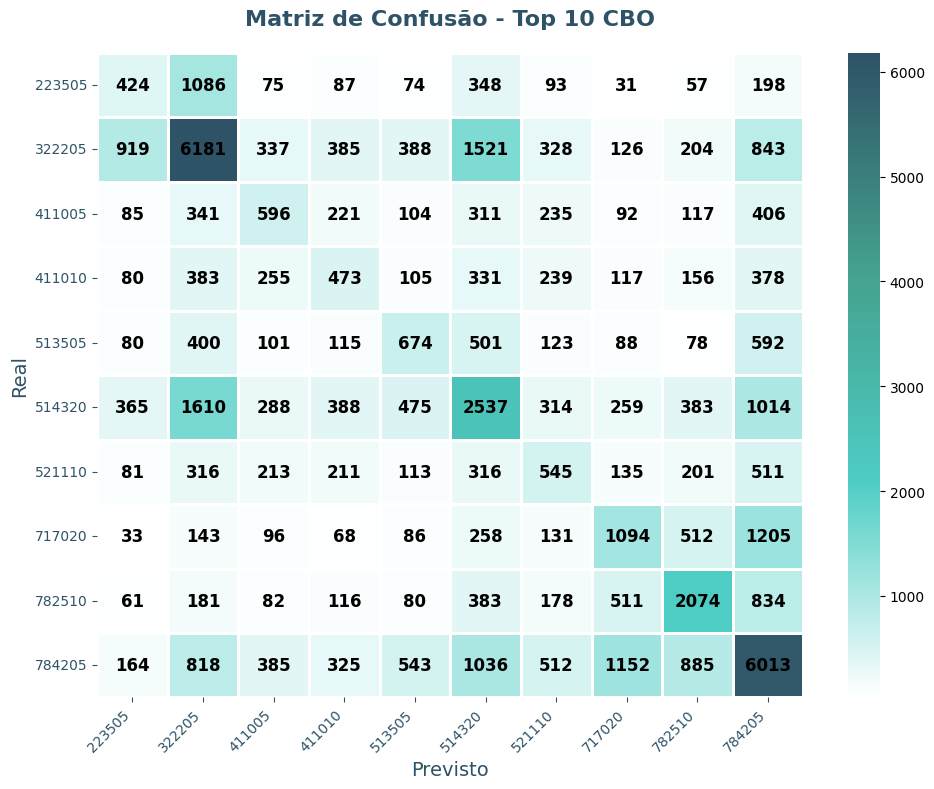

In [ ]:
# Matriz de Confusão
cm = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Previsto'])

# Criar colormap personalizado Sea Resort
sea_resort_colors = ['#ffffff', '#4ECDC4', '#44A08D', '#2E5266']
sea_resort_cmap = LinearSegmentedColormap.from_list('sea_resort', sea_resort_colors, N=256)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=sea_resort_cmap,
            linewidths=1, linecolor='white',
            annot_kws={'fontsize': 12, 'fontweight': 'bold', 'color': '#000000'})

plt.title("Matriz de Confusão - Top 10 CBO", fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Previsto', fontsize=14, color='#2E5266')
plt.ylabel('Real', fontsize=14, color='#2E5266')

# Estilização dos eixos
plt.gca().tick_params(colors='#2E5266')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelo.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance.head(10))


Importância das Features:
                                             Feature  Importance
0                                              Idade    0.782562
1                          Sexo_Feminino                0.039227
3                          Sexo_Masculino               0.027507
9    Agente  Causador  Acidente_Agente Infeccioso ou    0.015276
277  Agente  Causador  Acidente_{ñ class}               0.012346
209  Agente  Causador  Acidente_Produto Biologico (S    0.007786
153  Agente  Causador  Acidente_Maquina, Nic            0.006925
269  Agente  Causador  Acidente_Veiculo Rodoviario M    0.006710
100  Agente  Causador  Acidente_Faca, Facao- Ferrame    0.004531
232  Agente  Causador  Acidente_Ser Vivo, Nic           0.003396


<ipython-input-39-0b8dfbb90aee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10),


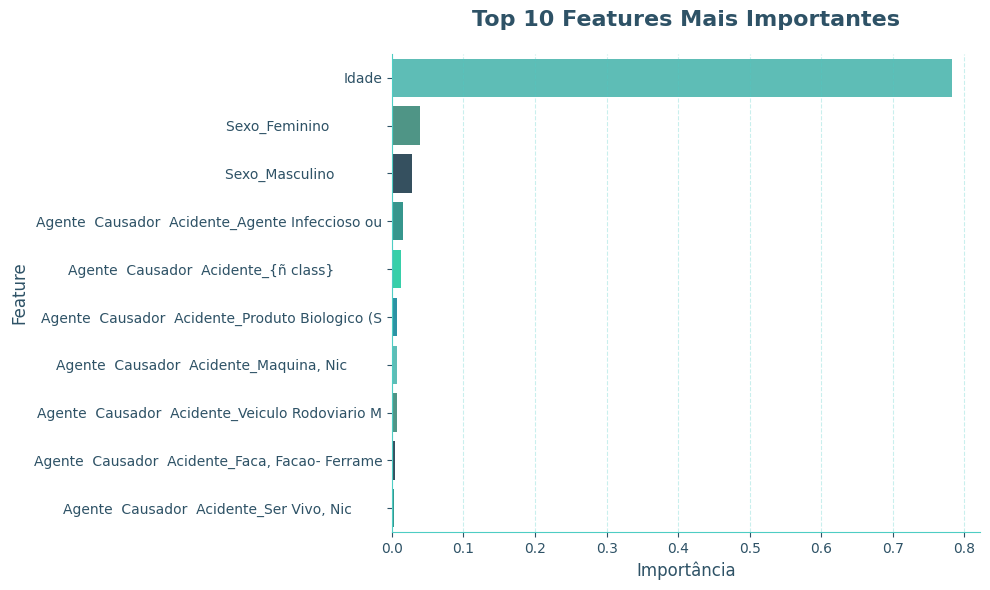

In [ ]:
sea_resort_palette = ['#4ECDC4', '#44A08D', '#2E5266', '#26A69A', '#1DE9B6',
                      '#17A2B8', '#4ECDC4', '#44A08D', '#2E5266', '#26A69A']

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10),
            palette=sea_resort_palette)

plt.title('Top 10 Features Mais Importantes', fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Importância', fontsize=12, color='#2E5266')
plt.ylabel('Feature', fontsize=12, color='#2E5266')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='x', alpha=0.3, color='#4ECDC4', linestyle='--')

plt.tight_layout()
plt.savefig('importancia_features.png', dpi=300, bbox_inches='tight')
plt.show()

# IMPLEMENTAÇÃO DO PROPHET PARA SÉRIES TEMPORAIS


In [ ]:
# Preparação para análise temporal geral
df_ts = combined_df[['Data Acidente', 'CBO']].copy()
df_ts['Data Acidente'] = pd.to_datetime(df_ts['Data Acidente'], errors='coerce')
df_ts.dropna(subset=['Data Acidente'], inplace=True)

In [ ]:
# Agrupar por data e contar ocorrências
df_treino = df_ts.groupby('Data Acidente').size().reset_index(name='y')
df_treino.rename(columns={'Data Acidente': 'ds'}, inplace=True)

print("Primeiras linhas do DataFrame para treinamento do Prophet:")
print(df_treino.head())

Primeiras linhas do DataFrame para treinamento do Prophet:
          ds   y
0 2023-01-01  15
1 2023-01-02  33
2 2023-01-03  26
3 2023-01-04  25
4 2023-01-05  29


In [ ]:
# Treinamento do modelo Prophet geral
modelo = Prophet()
modelo.fit(df_treino)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/i0yxc6ua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/nok9rw7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50145', 'data', 'file=/tmp/tmppcgemo4e/i0yxc6ua.json', 'init=/tmp/tmppcgemo4e/nok9rw7w.json', 'output', 'file=/tmp/tmppcgemo4e/prophet_modelqnfu0bny/prophet_model-20250526214941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Previsão para 365 dias
future = modelo.make_future_dataframe(periods=365)
forecast = modelo.predict(future)

print("Últimas previsões geradas:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Últimas previsões geradas:
             ds         yhat   yhat_lower   yhat_upper
1090 2025-12-27 -3773.149113 -5107.400245 -2542.502092
1091 2025-12-28 -4067.727861 -5307.996575 -2801.451139
1092 2025-12-29 -2829.616666 -4097.004131 -1643.450424
1093 2025-12-30 -2834.300370 -4137.485427 -1713.891333
1094 2025-12-31 -2852.982455 -4075.220939 -1588.511221


<function matplotlib.pyplot.show(close=None, block=None)>

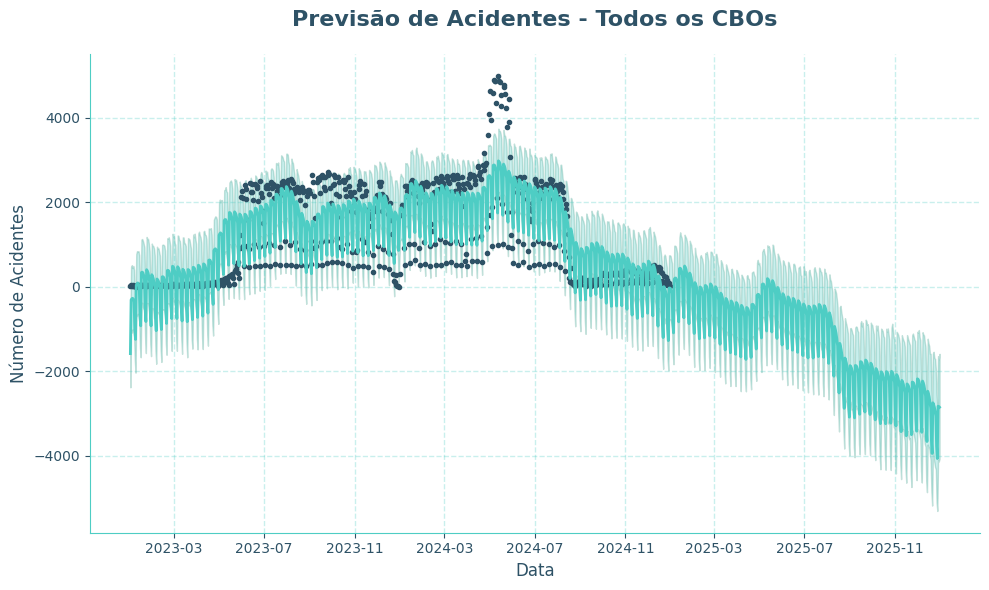

In [ ]:
# Visualização das previsões
fig1 = modelo.plot(forecast)

# Personalizar cores Sea Resort
ax = plt.gca()

# Alterar cores das linhas
lines = ax.get_lines()
if len(lines) >= 1:
    lines[0].set_color('#2E5266')  # Linha principal - azul escuro
    lines[0].set_linewidth(2.5)
if len(lines) >= 2:
    lines[1].set_color('#4ECDC4')  # Linha de previsão - teal claro
    lines[1].set_linewidth(2)

# Alterar cores das áreas de incerteza
collections = ax.collections
for collection in collections:
    collection.set_facecolor('#4ECDC4')
    collection.set_alpha(0.3)
    collection.set_edgecolor('#44A08D')

# Estilização do gráfico
plt.title('Previsão de Acidentes - Todos os CBOs', fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Data', fontsize=12, color='#2E5266')
plt.ylabel('Número de Acidentes', fontsize=12, color='#2E5266')

# Personalizar eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#4ECDC4')
ax.spines['bottom'].set_color('#4ECDC4')
ax.tick_params(colors='#2E5266')
ax.grid(True, alpha=0.3, color='#4ECDC4', linestyle='--')

plt.tight_layout()
plt.savefig('previsao_geral.png', dpi=300, bbox_inches='tight')
plt.show

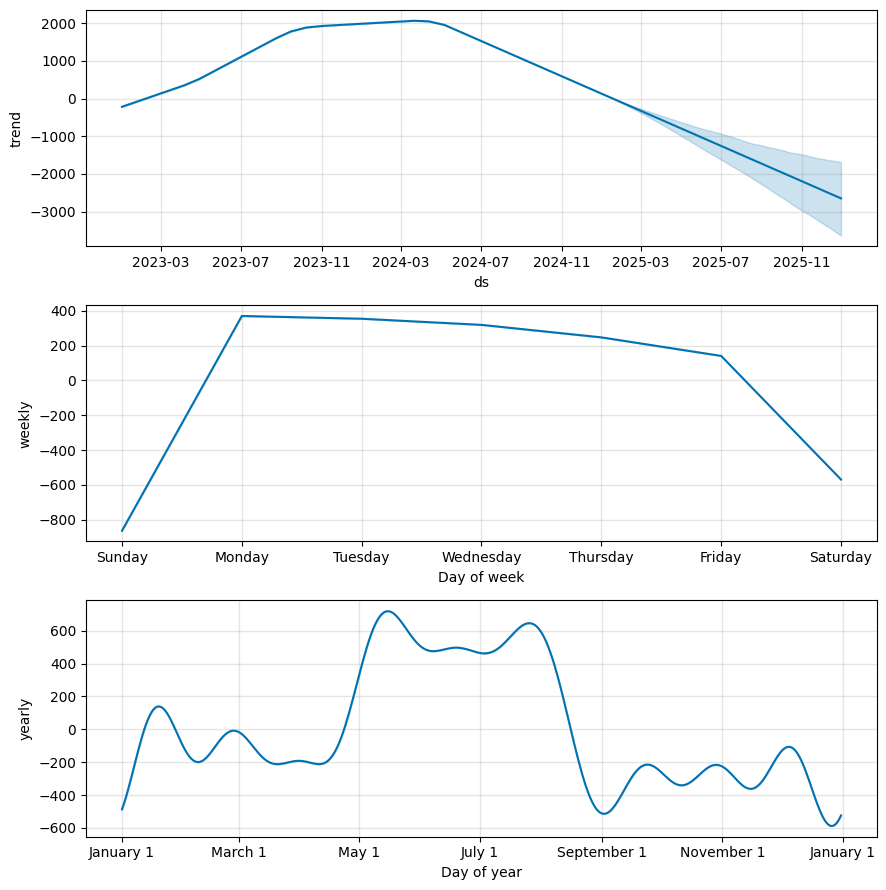

In [ ]:
# Visualização dos componentes da série temporal
fig2 = modelo.plot_components(forecast)
plt.savefig('componentes_serie_temporal.png')
plt.show()

In [ ]:
# Análise por CBO específico
cbo_count = df_ts['CBO'].value_counts().head(3).index.tolist()  # 3 CBOs mais frequentes

print(f"Analisando os 3 CBOs mais frequentes: {cbo_count}")

Analisando os 3 CBOs mais frequentes: [784205, 322205, 514320]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/ya3kfru6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/bxiumq1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7121', 'data', 'file=/tmp/tmppcgemo4e/ya3kfru6.json', 'init=/tmp/tmppcgemo4e/bxiumq1h.json', 'output', 'file=/tmp/tmppcgemo4e/prophet_model0ay4ff5c/prophet_model-20250526214953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Analisando CBO 784205...


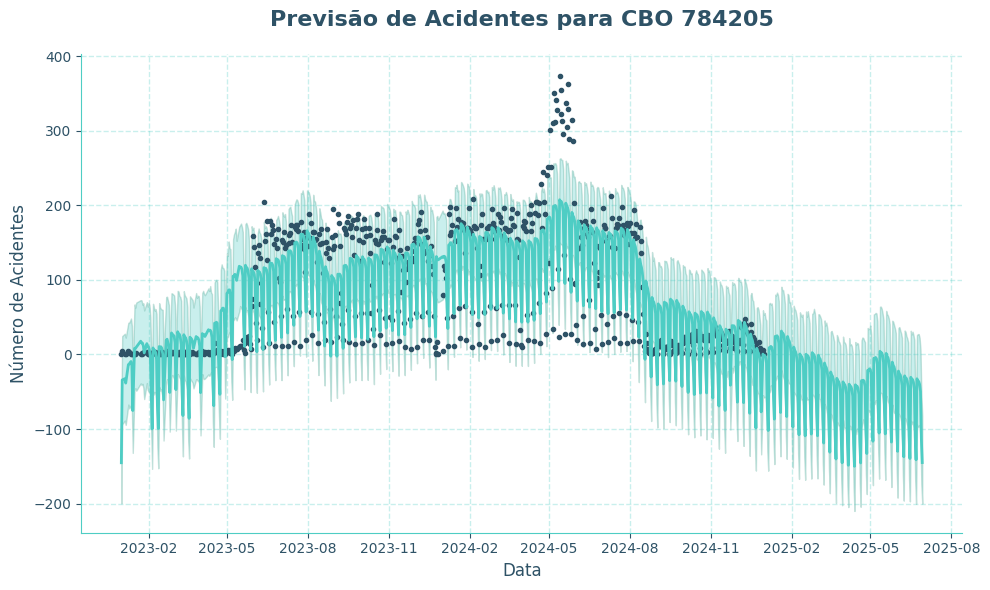

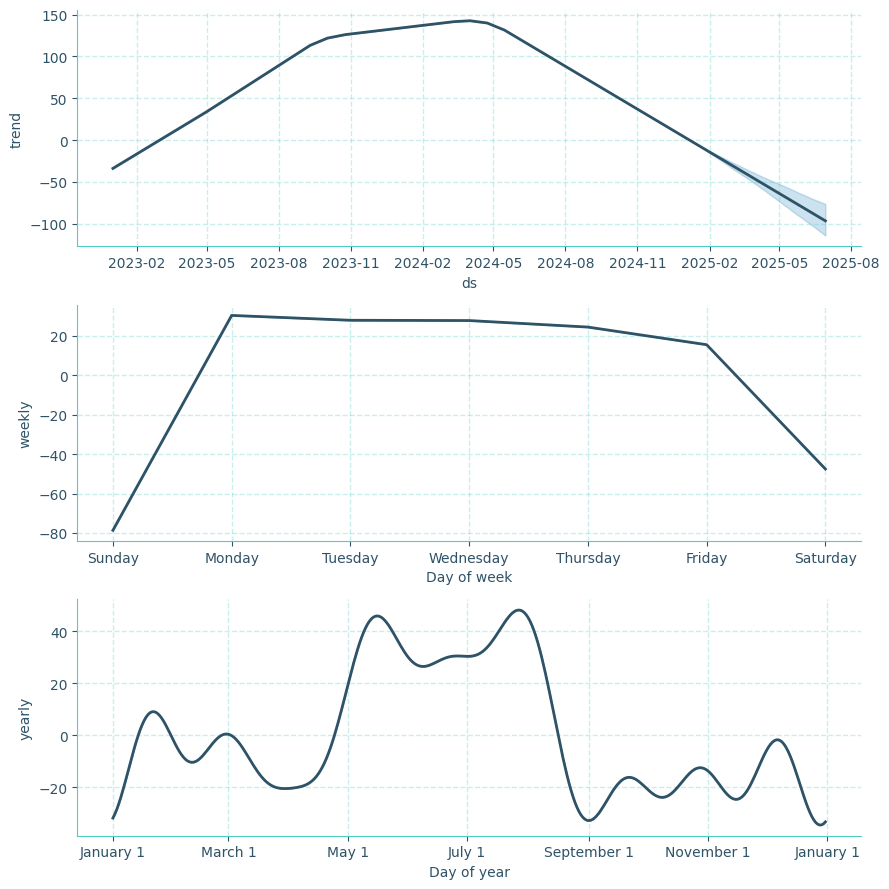

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/l_r2d1z0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/xcfghowm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54374', 'data', 'file=/tmp/tmppcgemo4e/l_r2d1z0.json', 'init=/tmp/tmppcgemo4e/xcfghowm.json', 'output', 'file=/tmp/tmppcgemo4e/prophet_modeld8x7t9l1/prophet_model-20250526214956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Analisando CBO 322205...


21:49:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


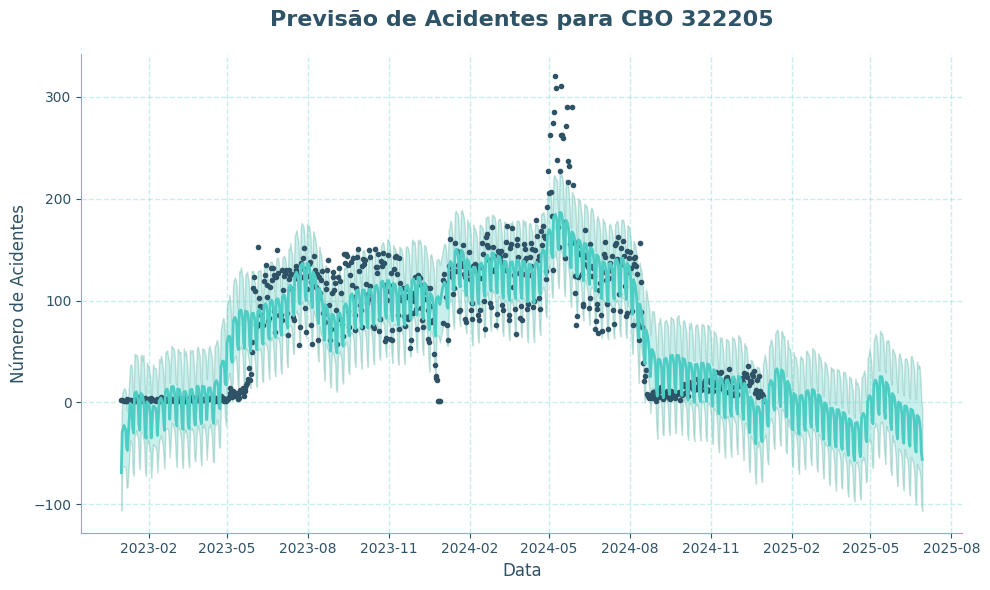

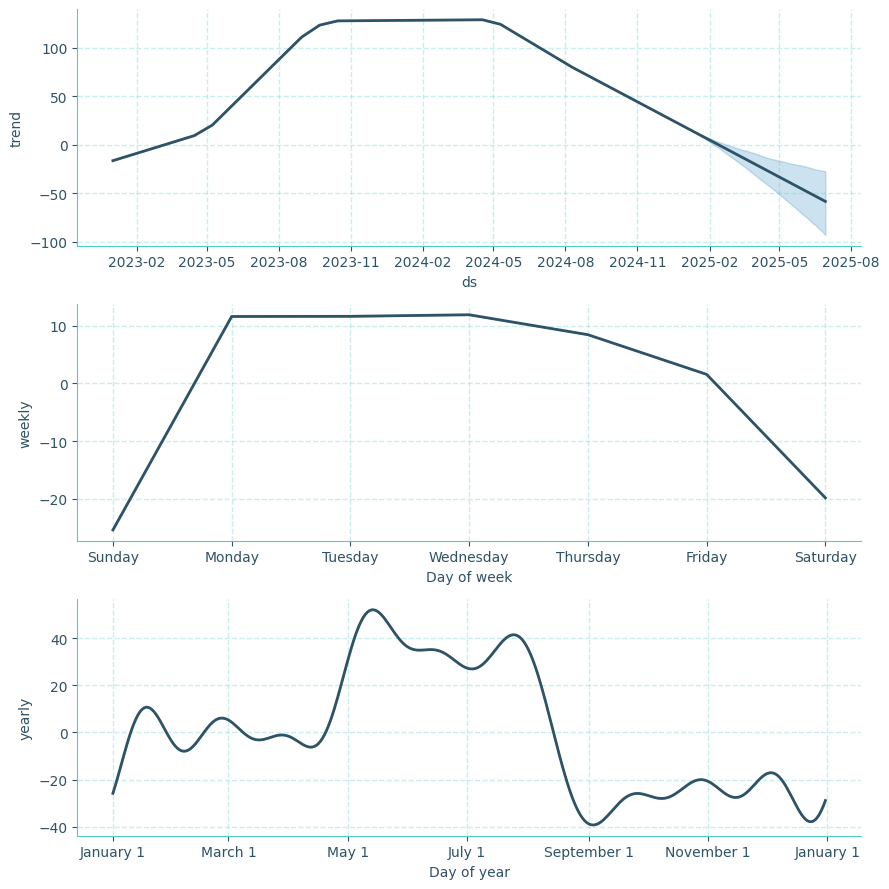

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/0vmg3tl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppcgemo4e/049cz275.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3148', 'data', 'file=/tmp/tmppcgemo4e/0vmg3tl_.json', 'init=/tmp/tmppcgemo4e/049cz275.json', 'output', 'file=/tmp/tmppcgemo4e/prophet_model49_6whb3/prophet_model-20250526214959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Analisando CBO 514320...


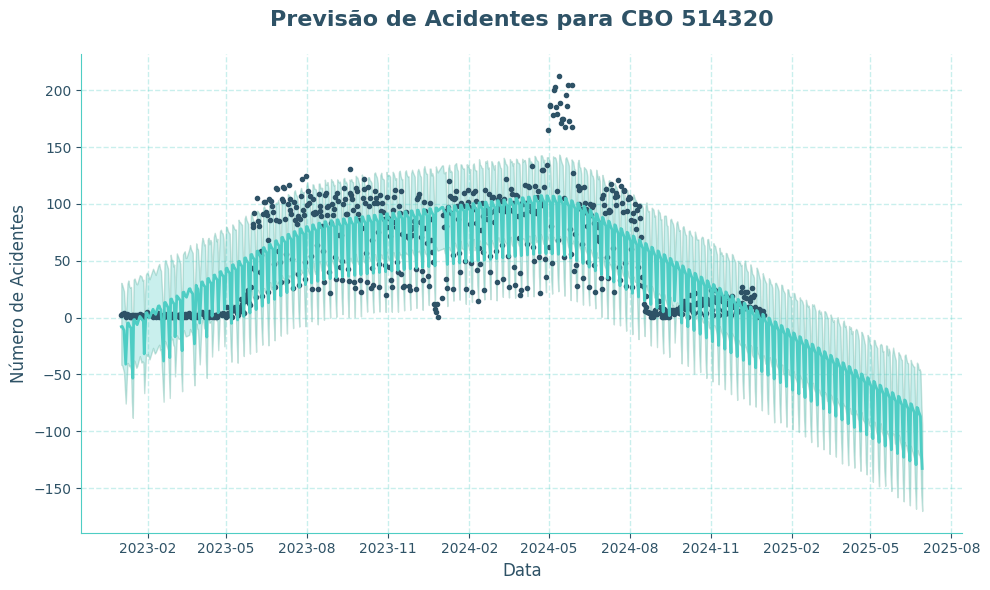

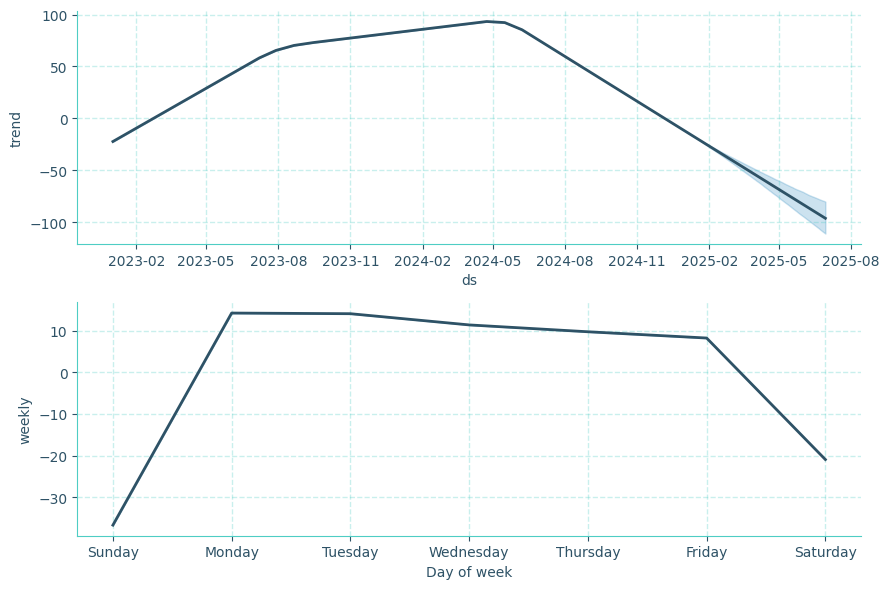

In [ ]:
# Gerar previsões para cada um dos 3 CBOs mais frequentes
for cbo in cbo_count:
    print(f"\nAnalisando CBO {cbo}...")

    # Filtrar para o CBO específico
    df_cbo = df_ts[df_ts["CBO"] == cbo]

    # Verificar se há dados suficientes
    if df_cbo.shape[0] < 30:
        print(f"  Dados insuficientes para CBO {cbo}. Pulando...")
        continue

    # Agregar por data
    df_treino_cbo = df_cbo.groupby("Data Acidente").size().reset_index(name="y")
    df_treino_cbo.rename(columns={"Data Acidente": "ds"}, inplace=True)

    # Treinamento do modelo
    modelo_cbo = Prophet()
    modelo_cbo.fit(df_treino_cbo)

    # Gerar previsões para 180 dias
    future_cbo = modelo_cbo.make_future_dataframe(periods=180)
    forecast_cbo = modelo_cbo.predict(future_cbo)

    # Plotar resultados com paleta Sea Resort
    fig = modelo_cbo.plot(forecast_cbo)
    ax = plt.gca()

    # Personalizar cores das linhas
    lines = ax.get_lines()
    if len(lines) >= 1:
        lines[0].set_color('#2E5266')  # Dados históricos - azul escuro
        lines[0].set_linewidth(2.5)
    if len(lines) >= 2:
        lines[1].set_color('#4ECDC4')  # Previsão - teal claro
        lines[1].set_linewidth(2)

    # Personalizar área de incerteza
    collections = ax.collections
    for collection in collections:
        collection.set_facecolor('#4ECDC4')
        collection.set_alpha(0.3)
        collection.set_edgecolor('#44A08D')

    # Estilização Sea Resort
    plt.title(f"Previsão de Acidentes para CBO {cbo}", fontsize=16, fontweight='bold', color='#2E5266', pad=20)
    plt.xlabel('Data', fontsize=12, color='#2E5266')
    plt.ylabel('Número de Acidentes', fontsize=12, color='#2E5266')

    # Personalizar eixos
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#4ECDC4')
    ax.spines['bottom'].set_color('#4ECDC4')
    ax.tick_params(colors='#2E5266')
    ax.grid(True, alpha=0.3, color='#4ECDC4', linestyle='--')

    plt.tight_layout()
    plt.savefig(f'previsao_cbo_{cbo}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plotar componentes com paleta Sea Resort
    fig_comp = modelo_cbo.plot_components(forecast_cbo)

    # Personalizar cada subplot dos componentes
    for i, ax in enumerate(fig_comp.axes):
        lines = ax.get_lines()
        for line in lines:
            line.set_color('#2E5266')
            line.set_linewidth(2)

        # Personalizar eixos
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#4ECDC4')
        ax.spines['bottom'].set_color('#4ECDC4')
        ax.tick_params(colors='#2E5266')
        ax.grid(True, alpha=0.3, color='#4ECDC4', linestyle='--')

        # Personalizar títulos dos subplots
        if ax.get_title():
            ax.set_title(ax.get_title(), fontsize=12, color='#2E5266', fontweight='bold')

        # Personalizar labels
        if ax.get_xlabel():
            ax.set_xlabel(ax.get_xlabel(), fontsize=10, color='#2E5266')
        if ax.get_ylabel():
            ax.set_ylabel(ax.get_ylabel(), fontsize=10, color='#2E5266')

    plt.tight_layout()
    plt.savefig(f'componentes_cbo_{cbo}.png', dpi=300, bbox_inches='tight')
    plt.show()

# VISUALIZAÇÕES ADICIONAIS PARA DASHBOARD

In [ ]:
# Criar uma cópia do DataFrame tratado
df_dash = df.copy()

Valores únicos na coluna UF Munic. Acidente:
['Maranhão            ' '{ñ class}           ' 'Piauí               '
 'Tocantins           ' 'Zerado              ' 'Rondônia            '
 'Roraima             ' 'Ceará               ' 'Pará                '
 'Acre                ' 'Rio Grande Norte    ' 'Amazonas            '
 'Amapá               ' 'Pernambuco          ' 'Sergipe             '
 'Alagoas             ' 'Paraíba             ']
Valores únicos na coluna UF Munic. Acidente:
['Maranhão            ' '{ñ class}           ' 'Piauí               '
 'Tocantins           ' 'Zerado              ' 'Rondônia            '
 'Roraima             ' 'Ceará               ' 'Pará                '
 'Acre                ' 'Rio Grande Norte    ' 'Amazonas            '
 'Amapá               ' 'Pernambuco          ' 'Sergipe             '
 'Alagoas             ' 'Paraíba             ']

Valores únicos após limpeza:
['Piauí' 'Tocantins' 'Maranhão' 'Rondônia' 'Pará' 'Roraima' 'Acre'
 'Sergipe' 'Ceará

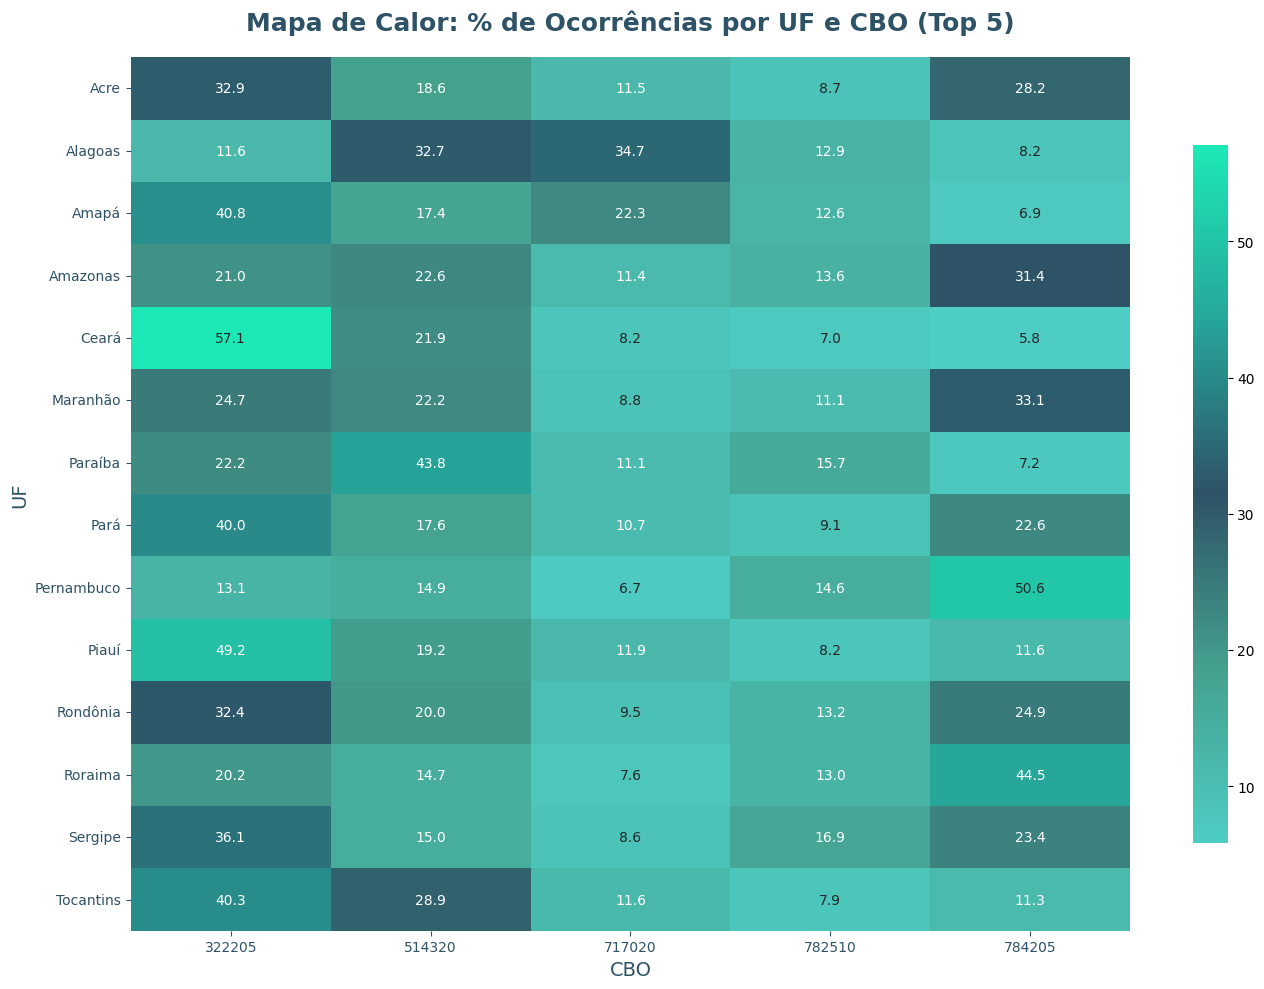

In [ ]:
df_clean = df_dash.copy()

print("Valores únicos na coluna UF Munic. Acidente:")
print(df_clean['UF  Munic.  Acidente'].unique())

# 3. Limpe espaços em branco e padronize a formatação
df_clean['UF  Munic.  Acidente'] = df_clean['UF  Munic.  Acidente'].str.strip()

# 4. Filtre explicitamente para manter apenas os estados reais
estados_validos = [
    'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
    'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul',
    'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí',
    'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia',
    'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'
]
df_clean = df_clean[df_clean['UF  Munic.  Acidente'].isin(estados_validos)]

# 5. Selecione os Top 5 CBOs após a limpeza para garantir precisão
top5_cbos = df_clean['CBO'].value_counts().head(5).index

# 6. Filtre para esses CBOs
df_heatmap = df_clean[df_clean['CBO'].isin(top5_cbos)]

df_clean = df_dash.copy()

print("Valores únicos na coluna UF Munic. Acidente:")
print(df_clean['UF  Munic.  Acidente'].unique())

# 3. Limpe espaços em branco e padronize a formatação
df_clean['UF  Munic.  Acidente'] = df_clean['UF  Munic.  Acidente'].str.strip()

# 4. Filtre explicitamente para manter apenas os estados reais
estados_validos = [
    'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
    'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul',
    'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí',
    'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia',
    'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'
]
df_clean = df_clean[df_clean['UF  Munic.  Acidente'].isin(estados_validos)]

# 5. Selecione os Top 5 CBOs após a limpeza para garantir precisão
top5_cbos = df_clean['CBO'].value_counts().head(5).index

# 6. Filtre para esses CBOs
df_heatmap = df_clean[df_clean['CBO'].isin(top5_cbos)]

# 7. Verifique se a filtragem funcionou
print("\nValores únicos após limpeza:")
print(df_heatmap['UF  Munic.  Acidente'].unique())
print(f"Total de registros para o mapa de calor: {df_heatmap.shape[0]}")

# 8. Crie a tabela pivot
pivot_uf_cbo = pd.crosstab(
    df_heatmap['UF  Munic.  Acidente'],
    df_heatmap['CBO'],
    normalize='index'  # Normalizar por linha para melhor comparação
) * 100  # Converter para percentual

# 9. Visualização do mapa de calor
sea_colors = ['#4ECDC4', '#44A08D', '#2E5266', '#26A69A', '#1DE9B6']
sea_cmap = LinearSegmentedColormap.from_list('sea_resort', sea_colors)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_uf_cbo, cmap=sea_cmap, annot=True, fmt='.1f',
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor: % de Ocorrências por UF e CBO (Top 5)',
          fontsize=18, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('CBO', fontsize=14, color='#2E5266')
plt.ylabel('UF', fontsize=14, color='#2E5266')

# Aplicar o mesmo estilo de bordas e cores
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')

plt.tight_layout()
plt.savefig('mapa_calor_uf_cbo_limpo.png', dpi=300, bbox_inches='tight')
plt.show()

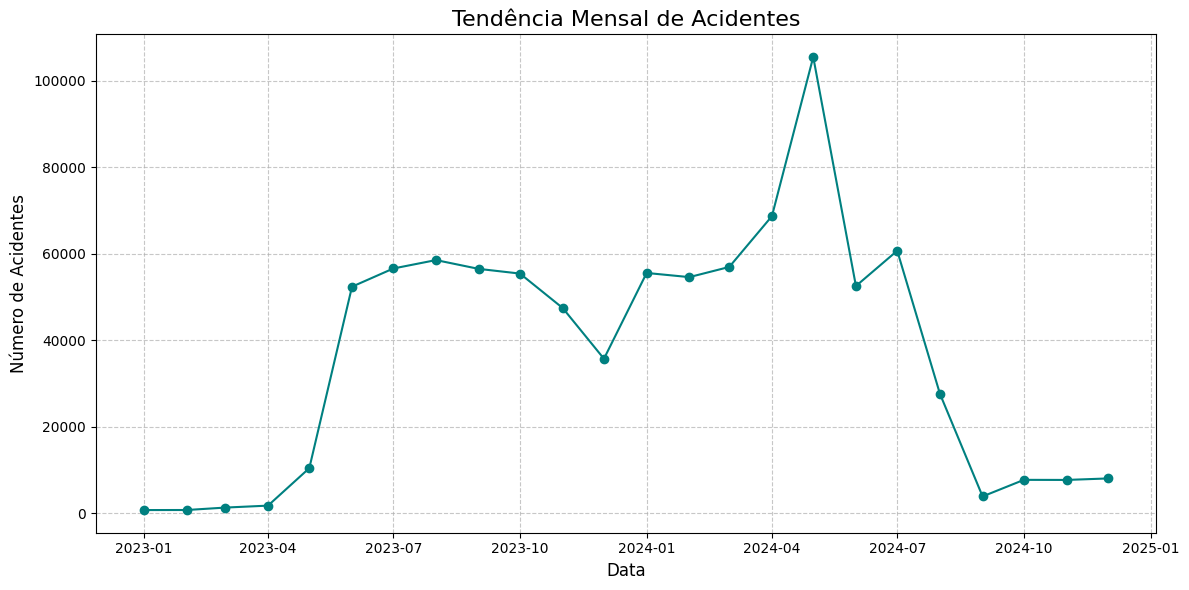

In [ ]:
# 2. Gráfico de tendência mensal agrupado por mês
df_dash['mes'] = df_dash['Data Acidente'].dt.month
df_dash['ano'] = df_dash['Data Acidente'].dt.year

# Agregação por mês e ano
tendencia_mensal = df_dash.groupby(['ano', 'mes']).size().reset_index(name='contagem')
tendencia_mensal['data'] = pd.to_datetime(tendencia_mensal['ano'].astype(str) + '-' + tendencia_mensal['mes'].astype(str) + '-01')
tendencia_mensal = tendencia_mensal.sort_values('data')

plt.figure(figsize=(12, 6))
plt.plot(tendencia_mensal['data'], tendencia_mensal['contagem'], marker='o', linestyle='-', color='teal')
plt.title('Tendência Mensal de Acidentes', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tendencia_mensal.png')
plt.show()

<ipython-input-56-5784867af65e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  piramide = df_dash.groupby(['Sexo', 'faixa_etaria']).size().unstack()


Categorias de Sexo encontradas: ['Feminino            ', 'Indeterminado       ', 'Masculino           ', 'Não Informado       ']


<Figure size 1400x1000 with 0 Axes>

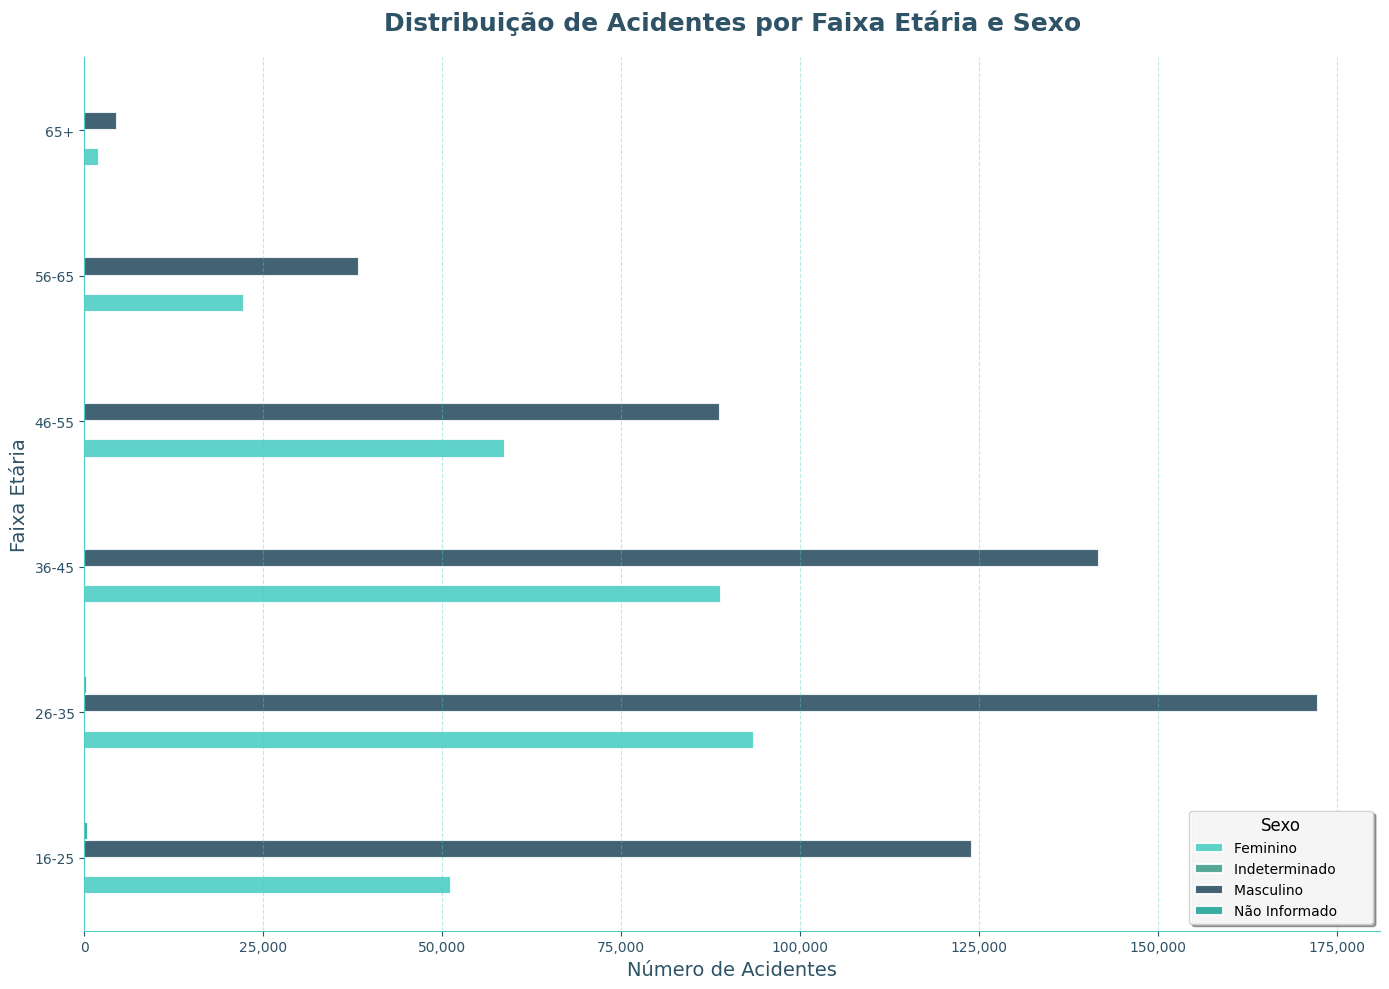


Análise por faixa etária:

Faixa 16-25: 175,691 acidentes
  Feminino            : 51,216 (29.2%)
  Indeterminado       : 5 (0.0%)
  Masculino           : 124,000 (70.6%)
  Não Informado       : 470 (0.3%)

Faixa 26-35: 266,436 acidentes
  Feminino            : 93,619 (35.1%)
  Indeterminado       : 4 (0.0%)
  Masculino           : 172,421 (64.7%)
  Não Informado       : 392 (0.1%)

Faixa 36-45: 230,957 acidentes
  Feminino            : 88,944 (38.5%)
  Indeterminado       : 13 (0.0%)
  Masculino           : 141,736 (61.4%)
  Não Informado       : 264 (0.1%)

Faixa 46-55: 147,627 acidentes
  Feminino            : 58,713 (39.8%)
  Indeterminado       : 3 (0.0%)
  Masculino           : 88,795 (60.1%)
  Não Informado       : 116 (0.1%)

Faixa 56-65: 60,683 acidentes
  Feminino            : 22,300 (36.7%)
  Indeterminado       : 2 (0.0%)
  Masculino           : 38,346 (63.2%)
  Não Informado       : 35 (0.1%)

Faixa 65+: 6,561 acidentes
  Feminino            : 1,980 (30.2%)
  Indeterminado

In [ ]:
# Gráfico de barras horizontais por faixa etária e sexo
# Criar faixas etárias
df_dash['faixa_etaria'] = pd.cut(df_dash['Idade'],
                              bins=[15, 25, 35, 45, 55, 65, 100],
                              labels=['16-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Agrupar por sexo e faixa etária
piramide = df_dash.groupby(['Sexo', 'faixa_etaria']).size().unstack()

print("Categorias de Sexo encontradas:", piramide.index.tolist())

# Paleta Sea Resort
sea_resort_cores = ['#4ECDC4', '#44A08D', '#2E5266', '#26A69A', '#1DE9B6', '#17A2B8']

plt.figure(figsize=(14, 10))

ax = piramide.T.plot(kind='barh', figsize=(14, 10),
                     color=sea_resort_cores,
                     alpha=0.9,
                     edgecolor='white',
                     linewidth=1.5)

plt.title('Distribuição de Acidentes por Faixa Etária e Sexo',
          fontsize=18, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Número de Acidentes', fontsize=14, color='#2E5266')
plt.ylabel('Faixa Etária', fontsize=14, color='#2E5266')

plt.grid(axis='x', linestyle='--', alpha=0.4, color='#4ECDC4')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#4ECDC4')
ax.spines['bottom'].set_color('#4ECDC4')
ax.tick_params(colors='#2E5266')

plt.legend(title='Sexo', title_fontsize=12, fontsize=10,
           loc='lower right', frameon=True, fancybox=True,
           shadow=True, framealpha=0.9)

plt.tight_layout()
plt.savefig('distribuicao_etaria_sexo_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

# Estatísticas por faixa etária
print("\nAnálise por faixa etária:")
for faixa in piramide.columns:
    total_faixa = piramide[faixa].sum()
    print(f"\nFaixa {faixa}: {total_faixa:,} acidentes")
    for sexo in piramide.index:
        if pd.notna(piramide.loc[sexo, faixa]):
            valor = piramide.loc[sexo, faixa]
            percentual = (valor / total_faixa * 100) if total_faixa > 0 else 0
            print(f"  {sexo}: {valor:,} ({percentual:.1f}%)")

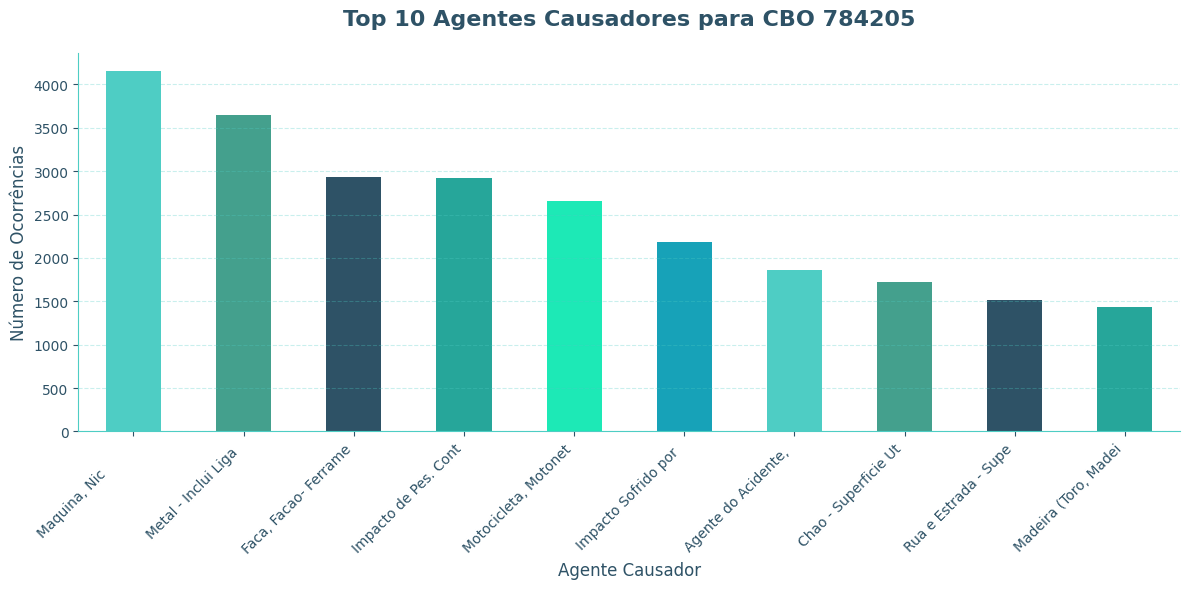

In [ ]:
# 4. Gráfico de barras para agentes causadores por CBO principal
# Selecionar o CBO mais frequente
top_cbo_code = df_dash['CBO'].value_counts().index[0]
top_cbo_data = df_dash[df_dash['CBO'] == top_cbo_code]

# Contar agentes causadores
# Changed 'Agente Causador Acidente' to 'Agente  Causador  Acidente'
top_agentes_cbo = top_cbo_data['Agente  Causador  Acidente'].value_counts().head(10)

sea_resort_palette = ['#4ECDC4', '#44A08D', '#2E5266', '#26A69A', '#1DE9B6',
                      '#17A2B8', '#4ECDC4', '#44A08D', '#2E5266', '#26A69A']

plt.figure(figsize=(12, 6))
top_agentes_cbo.plot(kind='bar', color=sea_resort_palette[:len(top_agentes_cbo)])

plt.title(f'Top 10 Agentes Causadores para CBO {top_cbo_code}',
          fontsize=16, fontweight='bold', color='#2E5266', pad=20)
plt.xlabel('Agente Causador', fontsize=12, color='#2E5266')
plt.ylabel('Número de Ocorrências', fontsize=12, color='#2E5266')

# Aplicar o mesmo estilo de bordas e cores
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4ECDC4')
plt.gca().spines['bottom'].set_color('#4ECDC4')
plt.gca().tick_params(colors='#2E5266')
plt.grid(axis='y', alpha=0.3, color='#4ECDC4', linestyle='--')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'agentes_causadores_cbo_{top_cbo_code}.png', dpi=300, bbox_inches='tight')
plt.show()


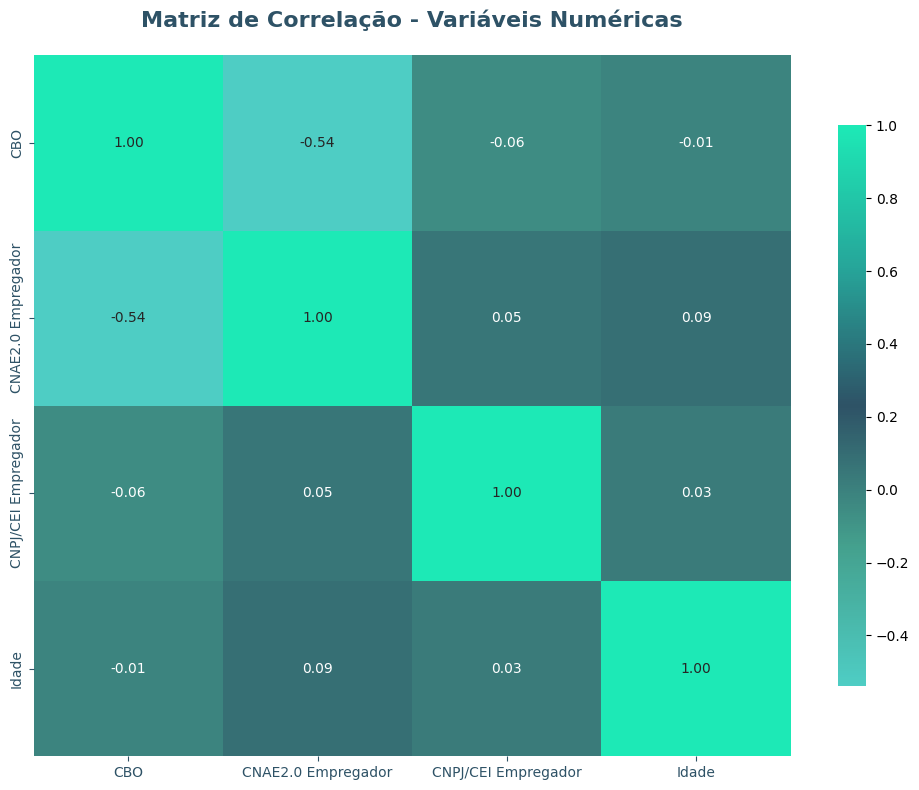

In [ ]:
# 5. Correlação entre variáveis numéricas (se houver mais de uma)
# Selecionar apenas colunas numéricas
df_num = df_dash.select_dtypes(include=['float64', 'int64'])

if df_num.shape[1] > 1:
    corr = df_num.corr()

    # Criar uma paleta personalizada baseada no sea_resort_palette para o heatmap
    sea_colors = ['#4ECDC4', '#44A08D', '#2E5266', '#26A69A', '#1DE9B6']
    sea_cmap = LinearSegmentedColormap.from_list('sea_resort', sea_colors)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap=sea_cmap,
                cbar_kws={'shrink': 0.8}, fmt='.2f')

    plt.title('Matriz de Correlação - Variáveis Numéricas',
              fontsize=16, fontweight='bold', color='#2E5266', pad=20)

    # Aplicar o mesmo estilo de bordas e cores
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#4ECDC4')
    plt.gca().spines['bottom'].set_color('#4ECDC4')
    plt.gca().tick_params(colors='#2E5266')

    plt.tight_layout()
    plt.savefig('matriz_correlacao.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Não há variáveis numéricas suficientes para análise de correlação.")
    print("\nProcessamento completo! Todas as visualizações foram geradas.")


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Filtrar para os 10 CBOs mais frequentes
counts = df['CBO'].value_counts()
top10_cbos = counts.head(10).index
df_rf = df[df['CBO'].isin(top10_cbos)].copy()
print(f"CBOs selecionados: {list(top10_cbos)}")
print(f"Registros após filtro: {df_rf.shape[0]}")

CBOs selecionados: [784205, 322205, 514320, 782510, 717020, 513505, 521110, 411010, 411005, 223505]
Registros após filtro: 258576


In [ ]:
# Feature Engineering: adicionar características temporais básicas
df_rf['Mes'] = df_rf['Data Acidente'].dt.month

In [ ]:
# Selecionar variáveis para o modelo (incluindo as novas)
features = ['Idade', 'Sexo', 'Agente  Causador  Acidente', 'Mes']  # Corrected feature name
target = 'CBO'
print(f"Variáveis preditoras expandidas: {features}")

Variáveis preditoras expandidas: ['Idade', 'Sexo', 'Agente  Causador  Acidente', 'Mes']


In [ ]:
df_model = df_rf[features + [target]].copy()
df_model.dropna(inplace=True)
print(f"Registros após remoção de valores ausentes: {df_model.shape[0]}")

Registros após remoção de valores ausentes: 258576


In [ ]:
# Converter variáveis categóricas em dummies
print("Convertendo variáveis categóricas em dummies...")
df_model = pd.get_dummies(df_model, columns=['Sexo', 'Agente  Causador  Acidente'])
print(f"Dimensões após conversão para dummies: {df_model.shape}")


Convertendo variáveis categóricas em dummies...
Dimensões após conversão para dummies: (258576, 280)


In [ ]:
# Separar X (features) e y (alvo)
X = df_model.drop(columns=[target])
y = df_model[target]

In [ ]:
# Dividir em treino e teste (usando stratify para manter proporção)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} registros")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} registros")


Tamanho do conjunto de treino: 206860 registros
Tamanho do conjunto de teste: 51716 registros


In [ ]:
# Aplicar SMOTE para balancear as classes na amostra
print("Aplicando SMOTE para balancear as classes...")
smote = SMOTE(random_state=42)
# Use X_train e y_train que foram definidos no passo anterior
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"Tamanho da amostra após balanceamento: {X_train_balanced.shape[0]} registros")

Aplicando SMOTE para balancear as classes...
Tamanho da amostra após balanceamento: 473300 registros


In [ ]:
# Definir parâmetros otimizados para memória
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [5]
}

In [ ]:
# Usar RandomizedSearchCV para reduzir consumo de memória
print("Otimizando hiperparâmetros do Random Forest...")
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=4,  # Reduzido para economizar memória
    cv=3,
    scoring='accuracy',
    n_jobs=2  # Reduzido para economizar memória
)

# Use os dados balanceados do treinamento (X_train_balanced, y_train_balanced)
random_search.fit(X_train_balanced, y_train_balanced)
best_params = random_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

# Treinar o modelo final com os melhores parâmetros nos dados balanceados
modelo_otimizado = RandomForestClassifier(random_state=42, **best_params)
modelo_otimizado.fit(X_train_balanced, y_train_balanced)

Otimizando hiperparâmetros do Random Forest...


In [ ]:
# Aplicar SMOTE ao conjunto de treinamento completo
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
modelo_otimizado.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
# Avaliar previsões no conjunto de teste
print("Avaliando o modelo otimizado...")
y_pred = modelo_otimizado.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia melhorada: {acc*100:.2f}%\n")


Avaliando o modelo otimizado...
Acurácia melhorada: 38.97%



In [ ]:
# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

      223505       0.18      0.26      0.21      2473
      322205       0.57      0.46      0.51     11232
      411005       0.21      0.24      0.22      2508
      411010       0.16      0.19      0.17      2517
      513505       0.25      0.28      0.26      2752
      514320       0.38      0.34      0.36      7633
      521110       0.18      0.21      0.20      2642
      717020       0.29      0.35      0.32      3626
      782510       0.44      0.52      0.47      4500
      784205       0.55      0.48      0.52     11833

    accuracy                           0.39     51716
   macro avg       0.32      0.33      0.32     51716
weighted avg       0.41      0.39      0.40     51716



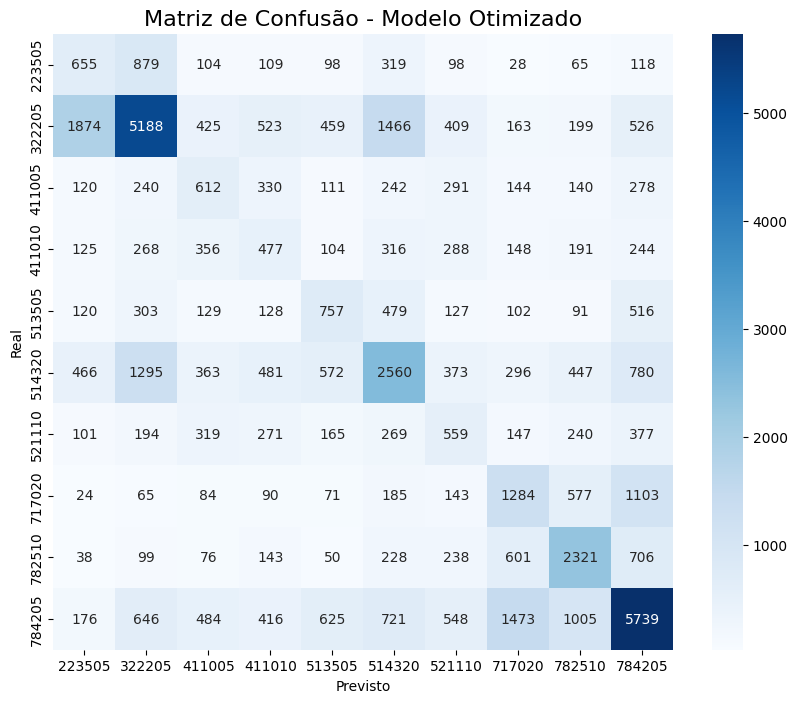

In [ ]:
# Matriz de Confusão
cm = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Previsto'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Modelo Otimizado", fontsize=16)
plt.savefig('matriz_confusao_otimizada.png')
plt.show()


Importância das Features (modelo otimizado):
                                             Feature  Importance
0                                              Idade    0.544052
1                                                Mes    0.104174
2                          Sexo_Feminino                0.029935
4                          Sexo_Masculino               0.028361
101  Agente  Causador  Acidente_Faca, Facao- Ferrame    0.013022
10   Agente  Causador  Acidente_Agente Infeccioso ou    0.012727
278  Agente  Causador  Acidente_{ñ class}               0.010222
165  Agente  Causador  Acidente_Motocicleta, Motonet    0.009980
270  Agente  Causador  Acidente_Veiculo Rodoviario M    0.009877
274  Agente  Causador  Acidente_Veiculo, Nic            0.006582


<ipython-input-64-8f8b727f8976>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


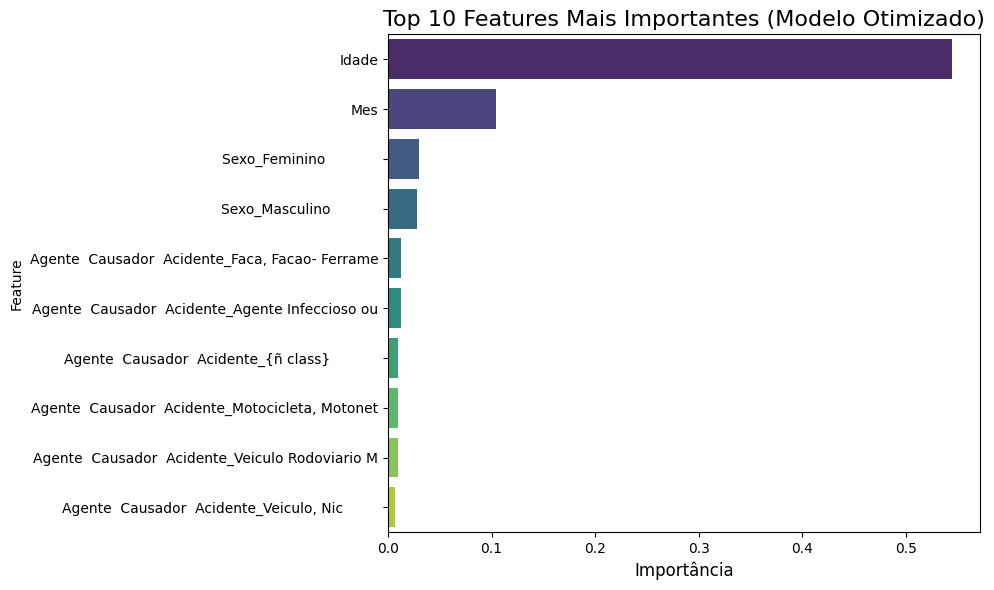

In [ ]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelo_otimizado.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nImportância das Features (modelo otimizado):")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Features Mais Importantes (Modelo Otimizado)', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.tight_layout()
plt.savefig('importancia_features_otimizado.png')
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git config --global user.name "estrelasdomackenzie"
!git config --global user.email "estrelasdomackenzie@gmail.com"

In [3]:
!git clone https://github.com/estrelasdomackenzie/Projeto-Aplicado-II..git

Cloning into 'Projeto-Aplicado-II.'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 2.03 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
%cd Projeto-Aplicado-II.


/content/Projeto-Aplicado-II.


In [6]:
!git add .


In [16]:
!ls -la "/content/drive/MyDrive/Projeto Aplicado II/Projeto Aplicado"







total 126142
-rw------- 1 root root  6782149 Sep 21  2024 D.SDA.PDA.005.CAT.202306.xltx
-rw------- 1 root root      184 Mar 17 23:33 D.SDA.PDA.005.CAT.202307.gsheet
-rw------- 1 root root  7244639 Sep 21  2024 D.SDA.PDA.005.CAT.202307.xltx
-rw------- 1 root root  7657984 Sep 21  2024 D.SDA.PDA.005.CAT.202308.xltx
-rw------- 1 root root  7317339 Sep 21  2024 D.SDA.PDA.005.CAT.202309.xltx
-rw------- 1 root root  7396871 Sep 21  2024 D.SDA.PDA.005.CAT.202310.xltx
-rw------- 1 root root  7444419 Sep 21  2024 D.SDA.PDA.005.CAT.202311.xltx
-rw------- 1 root root  7048009 Sep 21  2024 D.SDA.PDA.005.CAT.202312.xltx
-rw------- 1 root root  6807000 Sep 21  2024 D.SDA.PDA.005.CAT.202401.xltx
-rw------- 1 root root  8041625 Sep 21  2024 D.SDA.PDA.005.CAT.202402.xltx
-rw------- 1 root root  8449165 Sep 21  2024 D.SDA.PDA.005.CAT.202403.xltx
-rw------- 1 root root 18206231 Sep 21  2024 D.SDA.PDA.005.CAT.202404.xltx
-rw------- 1 root root  8908256 Sep 21  2024 D.SDA.PDA.005.CAT.202405.xltx
-rw-------

In [19]:
!git add .


In [21]:
!mkdir -p Base_de_dados


In [28]:
!ls -lh /content/Projeto-Aplicado-II./Base_de_dados/







total 124M
-rw------- 1 root root 6.5M May 26 23:48 D.SDA.PDA.005.CAT.202306.xltx
-rw------- 1 root root 7.0M May 26 23:48 D.SDA.PDA.005.CAT.202307.xltx
-rw------- 1 root root 7.4M May 26 23:48 D.SDA.PDA.005.CAT.202308.xltx
-rw------- 1 root root 7.0M May 26 23:48 D.SDA.PDA.005.CAT.202309.xltx
-rw------- 1 root root 7.1M May 26 23:48 D.SDA.PDA.005.CAT.202310.xltx
-rw------- 1 root root 7.1M May 26 23:48 D.SDA.PDA.005.CAT.202311.xltx
-rw------- 1 root root 6.8M May 26 23:48 D.SDA.PDA.005.CAT.202312.xltx
-rw------- 1 root root 6.5M May 26 23:48 D.SDA.PDA.005.CAT.202401.xltx
-rw------- 1 root root 7.7M May 26 23:48 D.SDA.PDA.005.CAT.202402.xltx
-rw------- 1 root root 8.1M May 26 23:48 D.SDA.PDA.005.CAT.202403.xltx
-rw------- 1 root root  18M May 26 23:48 D.SDA.PDA.005.CAT.202404.xltx
-rw------- 1 root root 8.5M May 26 23:48 D.SDA.PDA.005.CAT.202405.xltx
-rw------- 1 root root 7.7M May 26 23:48 D.SDA.PDA.005.CAT.202406.xltx
-rw------- 1 root root 9.4M May 26 23:49 D.SDA.PDA.005.CAT.202407.

In [29]:
!git add Base_de_dados

In [30]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202306.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202307.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202308.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202309.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202310.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202311.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202312.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202401.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202402.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202403.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202404.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202405.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202406.xltx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202407.xlsx
	new file:   Base_de_dados/D.SDA.PDA.005.CAT.202408.xlsx
	new f